# **Analyzing the Interplay of BTC, S&P 500, and Gold: Unveiling Correlations through Financial Data Analysis**

In today's fast-paced and interconnected world, understanding the relationships between various investment options is crucial for making informed decisions. As digital currencies have gained significant traction and traditional assets continue to be sought after, it becomes essential to explore how these assets influence each other and whether they exhibit any discernible patterns.

Within this document, I will present a detailed analysis of the BTC curve, S&P 500 curve, and gold curve. By visualizing these curves, I aim to provide you with a clear representation of their price fluctuations and performance over a specific time period. Moreover, I explore the potential correlations that may exist between these assets, shedding light on their interdependencies and offering valuable insights for asset allocation strategies and risk management.

**Is Bitcoin Really Digital Gold?**

Comparing the price movements of the S&P 500, BTC, and gold over time can provide valuable insights into how people perceive the use of BTC as an investment asset. The price movements of BTC, S&P 500, and gold can reflect investors' risk perception and sentiment towards different asset classes. During periods of economic uncertainty or market turbulence, traditional investors might flock towards gold as a safe-haven asset. Comparing the performance of BTC against gold and the S&P 500 can shed light on whether BTC is increasingly perceived as a store of value or a hedge against market risks.

Also, BTC is a relatively new asset compared to the well-established S&P 500 and gold. Analyzing how BTC's price movement compares to the more traditional assets like the S&P 500 and gold can provide insights into its level of market acceptance and integration. If BTC demonstrates similar or even superior performance compared to these assets over time, it could indicate increasing acceptance and recognition of BTC as a legitimate investment instrument.

By comparing the price movements of BTC, the S&P 500, and gold over time, investors and analysts can gain valuable insights into the evolving perceptions and uses of BTC as an investment asset. However, it's important to note that price movements alone do not provide a comprehensive analysis. Fundamental factors, technological developments, regulatory changes, and broader market dynamics should also be taken into consideration when assessing the long-term viability and potential of BTC as an investment.

It is worth mentioning that this document is intended purely for informational purposes and does not constitute financial advice. Its primary objective is to demonstrate my technical competence in utilizing the aforementioned tools and presenting data-driven analyses effectively. Therefore, I encourage you to use the information provided herein as a starting point for further research and critical evaluation.

I hope that this document sparks your interest and enhances your understanding of the correlations between Bitcoin, the S&P 500, and gold. May it serve as a valuable resource for your endeavors within the ever-evolving financial landscape.

## **Load packages and data, define the  functions**

The first step in our analysis is to load the necessary packages and retrieve the data for Bitcoin (BTC), S&P 500, and gold. We will be utilizing the yfinance package and the CryptoCompare API for this purpose.

To begin, we need to ensure that the required packages are installed in our Python environment.

Once the package is installed, we can proceed to import the necessary libraries and retrieve the data.

**Install the needed packages**

In [4]:
!pip install cryptocompare
!pip install yfinance
!pip install robin-stocks

  Preparing metadata (setup.py) ... done
  Created wheel for cryptocompare: filename=cryptocompare-0.7.6-py3-none-any.whl size=6290 sha256=cb3899f66821ccf6a9fb3508707aa29dbe7a09abf87371ab8231ff48f5a1cc48
  Stored in directory: /root/.cache/pip/wheels/97/81/6a/261bc499b9d9bf8b391eea52c90a4746b477539564b0a66c94
Successfully built cryptocompare
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 60.5 MB/s eta 0:00:00


**Import the needed packages**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime
import seaborn as sns
sns.set_style('white', {'axes.spines.right': True, 'axes.spines.top': False})
import cryptocompare as cc
import yfinance as yf
import requests
import IPython
import yaml
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import the data**

In [ ]:
# Set the API Key from a yaml file
yaml_file = open('/content/drive/My Drive/Colab Notebooks/On-chain analysis/api_config_cryptocompare.yml', 'r')
p = yaml.load(yaml_file, Loader=yaml.FullLoader)
api_key = p['api_key']
# alternatively if you have not stored your API key in a separate file
# api_key = your key

# Number of past days for which we retrieve data
data_limit = 2000

# Define coin symbols, here we use BTC
symbol_a = 'BTC'

# Load the price data
base_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym='
df_a = api_call(f'{base_url}{symbol_a}&tsym=USD&limit={data_limit}')
coin_a_price_df = prepare_pricedata(df_a)

gold = yf.download("GC=F", period=str(1000)+"d").reset_index()
gold.columns = map(str.lower, gold.columns)
gold['date'] = pd.to_datetime(gold['date'], unit='s')

SP500 = yf.download("^GSPC", period=str(1000)+"d").reset_index()
SP500.columns = map(str.lower, SP500.columns)
SP500['date'] = pd.to_datetime(SP500['date'], unit='s')

rolling_window = 25
coin_a_price_df['close_avg'] = coin_a_price_df['close'].rolling(window=rolling_window).mean()
gold['close_avg'] = gold['close'].rolling(window=rolling_window).mean()
SP500['close_avg'] = SP500['close'].rolling(window=rolling_window).mean()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Define the needed functions**

In [ ]:
# Generic function for an API call to a given URL
def api_call(url):
  # Set API Key as Header
  headers = {'authorization': 'Apikey ' + api_key,}
  session = requests.Session()
  session.headers.update(headers)

  # API call to cryptocompare
  response = session.get(url)

  # Conversion of the response to dataframe
  historic_blockdata_dict = json.loads(response.text)
  df = pd.DataFrame.from_dict(historic_blockdata_dict.get('Data').get('Data'), orient='columns', dtype=None, columns=None)
  return df

# This function prepares the data for proper treatment
def prepare_pricedata(df):
  df['date'] = pd.to_datetime(df['time'], unit='s')
  df.drop(columns=['time', 'conversionType', 'conversionSymbol'], inplace=True)
  return df

# This function adds bitcoin halving dates as vertical lines
def add_halving_dates(ax, df_x_dates, df_ax1_y):
    halving_dates = ['2009-01-03', '2012-11-28', '2016-07-09', '2020-05-11', '2024-03-12', '2028-06-01']
    dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in halving_dates]
    for i, datex in enumerate(dates_list):
        halving_ts = pd.Timestamp(datex)
        x_max = df_x_dates.max() + timedelta(days=365)
        x_min = df_x_dates.min() - timedelta(days=365)
        if (halving_ts < x_max) and (halving_ts > x_min):
            ax.axvline(x=datex, color = 'purple', linewidth=1, linestyle='dashed')
            ax.text(x=datex  + timedelta(days=20), y=df_ax1_y.max()*0.99, s='BTC Halving ' + str(i) + '\n' + str(datex), color = 'purple')

# This function creates a nice legend for twinx plots
def add_twinx_legend(ax1, ax2, x_anchor=1.18, y_anchor=1.0):
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc=1, facecolor='white', framealpha=0, bbox_to_anchor=(x_anchor, y_anchor))
    ax2.get_legend().remove()

def create_lineplot(coin_a_price_df, coin_b_price_df,coin_a,coin_b):
  fig, ax1 = plt.subplots(figsize=(16, 6))
  sns.lineplot(data=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close', color='cornflowerblue', linewidth=0.5, label=f'{coin_a} close price', ax=ax1)
  sns.lineplot(data=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close_avg', color='blue', linestyle='dashed', linewidth=1.0,
      label=f'{coin_a} {rolling_window}-MA', ax=ax1)
  ax1.set_ylabel(f'{coin_a} Prices')
  ax1.set(xlabel=None)
  ax2 = ax1.twinx()
  sns.lineplot(data=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close', color='lightcoral', linewidth=0.5, label=f'{coin_b} close price', ax=ax2)
  sns.lineplot(data=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close_avg', color='red', linestyle='dashed', linewidth=1.0,
      label=f'{coin_b} {rolling_window}-MA', ax=ax2)
  ax2.set_ylabel(f'{coin_b} Prices')
  add_twinx_legend(ax1, ax2, 0.98, 0.2)
  #add_halving_dates(ax1, coin_a_price_df.date, coin_a_price_df.close)
  #ax1.set_yscale('log'), ax2.set_yscale('log')
  plt.title(f'Prices of {coin_a} and {coin_b} since 2020')
  plt.show()

def compare_asset_performance(asset1_close_prices, asset2_close_prices, asset1, asset2):
    # Calculate the returns
    asset1_returns = [(asset1_close_prices[i] - asset1_close_prices[i-1]) / asset1_close_prices[i-1] for i in range(1, len(asset1_close_prices))]
    asset2_returns = [(asset2_close_prices[i] - asset2_close_prices[i-1]) / asset2_close_prices[i-1] for i in range(1, len(asset2_close_prices))]

    # Calculate cumulative returns
    asset1_cum_returns = [1]
    asset2_cum_returns = [1]

    for i in range(len(asset1_returns)):
        asset1_cum_returns.append(asset1_cum_returns[i] * (1 + asset1_returns[i]))
        asset2_cum_returns.append(asset2_cum_returns[i] * (1 + asset2_returns[i]))

    # Create the plot
    plt.figure(figsize=(16, 6))
    plt.plot(asset1_close_prices.index, asset1_cum_returns, label=asset1)
    plt.plot(asset2_close_prices.index, asset2_cum_returns, label=asset2)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Returns')
    plt.title('Comparison of Asset Performances')
    plt.legend()
    plt.grid(True)
    plt.show()

def zoom_compare(coin_a_price_df, coin_b_price_df,coin_a,coin_b):

  # Create the subplot grid
  fig = make_subplots(rows=1, cols=2, shared_xaxes=True)

  # Add the first line plot for coin_a_price_df
  fig.add_trace(go.Scatter(
      x=coin_a_price_df['date'][coin_a_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2023,1,1)]['close'],
      mode='lines',
      name=f'{coin_a} close price',
      line=dict(color='cornflowerblue', width=0.5)
  ), row=1, col=1)

  fig.add_trace(go.Scatter(
      x=coin_a_price_df['date'][coin_a_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2023,1,1)]['close_avg'],
      mode='lines',
      name=f'{coin_a} {rolling_window}-MA',
      line=dict(color='blue', width=1.0, dash='dash')
  ), row=1, col=1)

  # Set the y-axis label for the first line plot
  fig.update_yaxes(title_text=f'{coin_a} Prices', secondary_y=False, row=1, col=1)

  # Add the second line plot for coin_b
  fig.add_trace(go.Scatter(
      x=coin_b_price_df['date'][coin_b_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2023,1,1)]['close'],
      mode='lines',
      name=coin_b+' close price',
      line=dict(color='lightcoral', width=0.5)
  ), row=1, col=2)

  fig.add_trace(go.Scatter(
      x=coin_b_price_df['date'][coin_b_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2023,1,1)]['close_avg'],
      mode='lines',
      name=f'{coin_b} {rolling_window}-MA',
      line=dict(color='red', width=1.0, dash='dash')
  ), row=1, col=2)

  # Set the y-axis label for the second line plot
  fig.update_yaxes(title_text=coin_b+ ' Prices', secondary_y=False, row=1, col=2)

  # Set the title of the plot
  fig.update_layout(title_text=f'Prices of {coin_a} and '+ coin_b)

  # Show the plot
  fig.show()

def corr_global():
  # Calculate the Rolling Correlation Coefficient
  rolling_window = 100 #days

  coin_a_price_df_corr = coin_a_price_df[coin_a_price_df["date"].isin(list(gold['date'].values))].reset_index()

  # Generate a work dataframe that includes closing prices and date
  df_price_merged = pd.DataFrame.from_dict(data={f'close_{"gold"}': gold['close'], f'close_{symbol_a}': coin_a_price_df_corr['close'], 'date': coin_a_price_df_corr['date']})
  # Create the rolling correlation dataframe
  df_temp = pd.DataFrame({'cor': gold.close.rolling(rolling_window).corr(coin_a_price_df_corr.close).dropna()})
  # Reverse the index and join the df to create a date index
  df_cor_dateindex = df_price_merged.join(df_temp[::-1].set_index(df_temp.index)).dropna().set_index('date')

  coin_a_price_df_corr_sp = coin_a_price_df[coin_a_price_df["date"].isin(list(SP500['date'].values))].reset_index()

  # Generate a work dataframe that includes closing prices and date
  df_price_mergedsp = pd.DataFrame.from_dict(data={f'close_{"SP500"}': SP500['close'], f'close_{symbol_a}': coin_a_price_df_corr_sp[coin_a_price_df_corr_sp['date'] > pd.Timestamp(2020,7,1)]['close'], 'date': coin_a_price_df_corr_sp[coin_a_price_df_corr_sp['date'] > pd.Timestamp(2020,7,1)]['date']})
  # Create the rolling correlation dataframe
  df_tempsp = pd.DataFrame({'cor': SP500.close.rolling(rolling_window).corr(coin_a_price_df_corr_sp.close).dropna()})
  # Reverse the index and join the df to create a date index
  df_cor_dateindexsp = df_price_mergedsp.join(df_tempsp[::-1].set_index(df_tempsp.index)).dropna().set_index('date')

  # Create the plot
  fig, ax1 = plt.subplots(figsize=(16, 6))
  label= f'{symbol_a}-{"gold / S&P500"} correlation (rolling window={rolling_window})'
  labelg = f'{symbol_a}-{"gold"} correlation (rolling window={rolling_window})'
  labelsp = f'{symbol_a}-{"S&P500"} correlation (rolling window={rolling_window})'
  sns.lineplot(data=df_cor_dateindex, x=df_cor_dateindex.index, y='cor', color='royalblue', linewidth=1.0, label=labelg)
  sns.lineplot(data=df_cor_dateindexsp, x=df_cor_dateindexsp.index, y='cor', color='red', linewidth=1.0, label=labelsp)
  #add_halving_dates(ax1, df_cor_dateindex.tail(100).index, df_cor_dateindex.tail(100)[f'cor'])
  plt.legend(framealpha=0)
  plt.title(label)

def corr_zoom():
  # Calculate the Rolling Correlation Coefficient
  rolling_window = 100 #days

  coin_a_price_df_corr = coin_a_price_df[coin_a_price_df["date"].isin(list(gold['date'].values))].reset_index()


  # Generate a work dataframe that includes closing prices and date
  df_price_merged = pd.DataFrame.from_dict(data={f'close_{"gold"}': gold['close'], f'close_{symbol_a}': coin_a_price_df_corr[coin_a_price_df_corr['date'] > pd.Timestamp(2023,1,1)]['close'], 'date': coin_a_price_df_corr[coin_a_price_df_corr['date'] > pd.Timestamp(2023,1,1)]['date']})
  # Create the rolling correlation dataframe
  df_temp = pd.DataFrame({'cor': gold.close.rolling(rolling_window).corr(coin_a_price_df_corr.close).dropna()})
  # Reverse the index and join the df to create a date index
  df_cor_dateindex = df_price_merged.join(df_temp[::-1].set_index(df_temp.index)).dropna().set_index('date')

  coin_a_price_df_corr_sp = coin_a_price_df[coin_a_price_df["date"].isin(list(SP500['date'].values))].reset_index()

  # Generate a work dataframe that includes closing prices and date
  df_price_mergedsp = pd.DataFrame.from_dict(data={f'close_{"SP500"}': SP500['close'], f'close_{symbol_a}': coin_a_price_df_corr_sp[coin_a_price_df_corr_sp['date'] > pd.Timestamp(2023,1,1)]['close'], 'date': coin_a_price_df_corr_sp[coin_a_price_df_corr_sp['date'] > pd.Timestamp(2023,1,1)]['date']})
  # Create the rolling correlation dataframe
  df_tempsp = pd.DataFrame({'cor': SP500.close.rolling(rolling_window).corr(coin_a_price_df_corr_sp.close).dropna()})
  # Reverse the index and join the df to create a date index
  df_cor_dateindexsp = df_price_mergedsp.join(df_tempsp[::-1].set_index(df_tempsp.index)).dropna().set_index('date')


  # Create the plot
  fig, ax1 = plt.subplots(figsize=(16, 6))
  label = f'{symbol_a}-{"gold / S&P500"} correlation (rolling window={rolling_window})'
  labelg = f'{symbol_a}-{"gold"} correlation (rolling window={rolling_window})'
  labelsp = f'{symbol_a}-{"S&P500"} correlation (rolling window={rolling_window})'
  sns.lineplot(data=df_cor_dateindex, x=df_cor_dateindex.index, y='cor', color='royalblue', linewidth=1.0, label=labelg)
  sns.lineplot(data=df_cor_dateindexsp, x=df_cor_dateindexsp.index, y='cor', color='red', linewidth=1.0, label=labelsp)
  #add_halving_dates(ax1, df_cor_dateindex.tail(100).index, df_cor_dateindex.tail(100)[f'cor'])
  plt.legend(framealpha=0)
  plt.title(label)

In the code snippet above, we import the yfinance library and define the ticker symbols for Bitcoin (BTC), S&P 500, and gold. The ticker symbols used here are the standard symbols recognized by Yahoo Finance.

Next, we utilize the yf.download() function to retrieve the historical data for each asset. The function takes parameters such as the ticker symbol, start date, and end date.



> **Please note that the code provided here is just an example, and you can customize it according to your specific requirements, such as adjusting the date range or adding additional data preprocessing steps as needed.**



Moving averages are calculated and added to the respective dataframes coin_a_price_df, gold, and SP500. The rolling() function is used to calculate the rolling mean over a specified window size (rolling_window). The close column of each dataframe is used as the input data for the moving average calculation. The resulting moving average values are stored in a new column called close_avg in each dataframe.

Moving averages are commonly used to smooth out price fluctuations and identify trends over a specific period. In this case, a rolling window of size 25 is chosen, meaning that the moving average is calculated using the previous 25 data points.

This section also defines a function add_halving_dates() that adds vertical lines and corresponding text annotations to the given plot (ax) for Bitcoin halving dates. Bitcoin halving is an event that occurs approximately every four years, where the block reward for mining new Bitcoins is halved. The function takes three arguments: the plot axes (ax), the x-axis dates (df_x_dates), and the maximum value of the y-axis (df_ax1_y).

The function uses a list of predefined halving dates and converts them into Python datetime.date objects. It then iterates over the dates and checks if each halving date falls within the x-axis range of the plot. If it does, a vertical line is added at the corresponding date using ax.axvline(), with a purple color, dashed line style, and linewidth of 1. Additionally, a text annotation is added next to the line, displaying the halving number (i) and the date.

## **Dip into the trends of the S&P 500 and gold curves**

### **BTC vs GOLD**

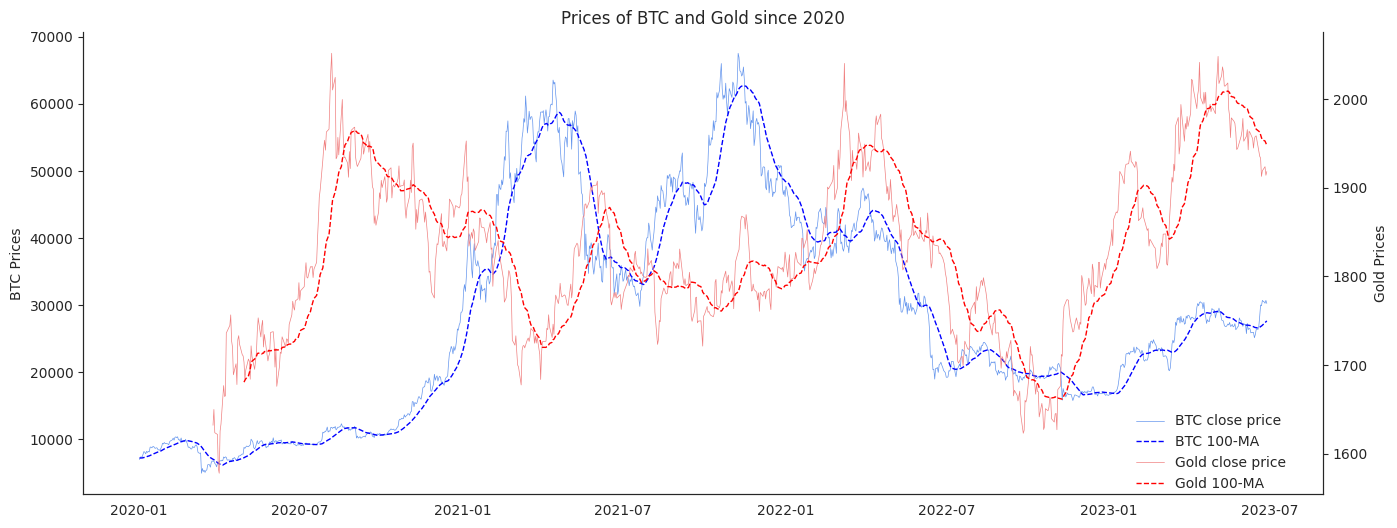

In [ ]:
create_lineplot(coin_a_price_df, gold, "BTC", "Gold")

 **BTC** has experienced remarkable growth and price appreciation over the past three years. In 2020, BTC entered a new phase of its market cycle, surpassing its previous all-time high and attracting increased attention from institutional investors and mainstream adoption. This trend continued into 2021, with BTC reaching new record highs. Factors contributing to BTC's positive performance include growing acceptance of cryptocurrencies, increasing institutional investment, the entry of major financial players into the crypto space, and the perception of BTC as a potential hedge against inflation and currency devaluation. After reaching it's peak in the end of 2021, BTC has plunged into another bear market that still lasts to this day. However, we can see a slight increase in BTC price since the beginning of 2023

**Gold** is a traditional safe-haven asset and store of value. Over the past three years, gold has also experienced notable price movements. In 2020, gold reached all-time highs due to the economic uncertainties caused by the COVID-19 pandemic. As the pandemic unfolded, investors sought the perceived stability and security of gold as a hedge against market volatility and inflationary concerns. However, in the subsequent years, gold prices experienced some fluctuations and consolidation as economic conditions improved and risk appetite returned to the markets. In the end of 2022, the price of gold has entered a new bull phase, earning over 20% in the last 6 months.

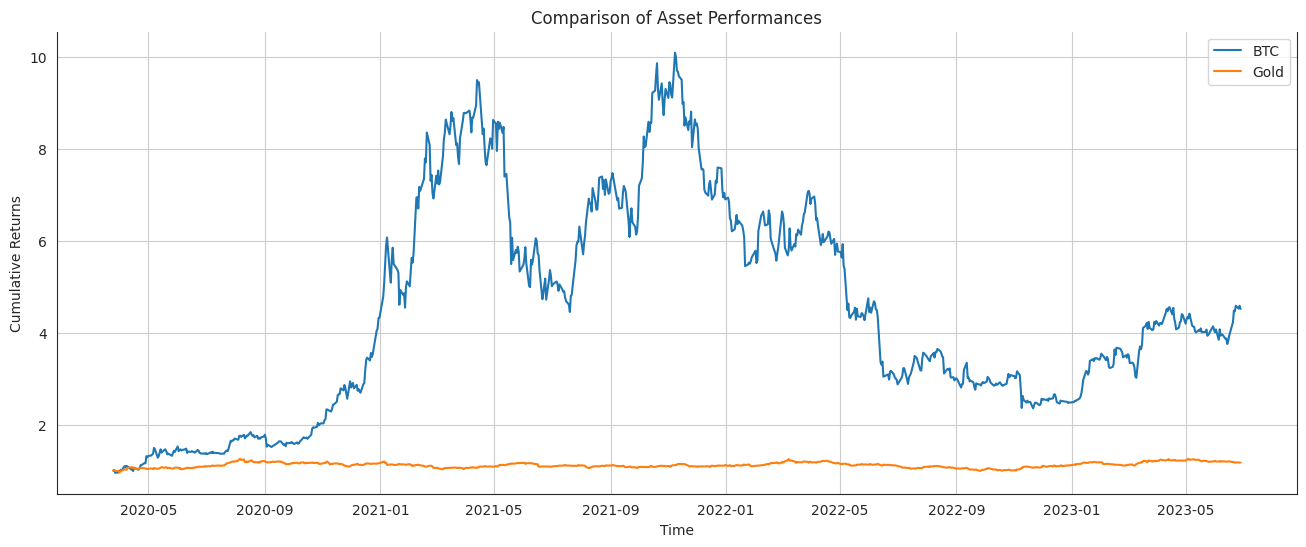

In [ ]:
coin_a_price_df_perf = coin_a_price_df[coin_a_price_df["date"].isin(list(gold['date'].values))].reset_index()
compare_asset_performance(coin_a_price_df_perf.set_index("date")['close'], gold.set_index("date")["close"], "BTC", "Gold")

Now let's have a closer look at what happened since the beginning of 2023 :

In [ ]:
zoom_compare(coin_a_price_df, gold, "BTC", "Gold")

The graph you have showing the price of BTC and gold since 2023 indicates that both BTC and gold prices have been increasing. This observation suggests a positive trend in both assets.

The upward movement in BTC and gold prices can be attributed to several factors:

*   **Market Confidence**: The increase in prices may indicate growing investor confidence in BTC and gold as reliable stores of value. During uncertain economic times or periods of market volatility, investors often turn to assets like BTC and gold as safe havens.

*   **Inflation Concerns**: Inflationary pressures in the economy can drive up the prices of both BTC and gold. Investors perceive these assets as a hedge against inflation because they have limited supply and are not directly tied to traditional fiat currencies.

*   **Demand and Adoption**: Increasing demand for BTC and gold can also contribute to their price appreciation. BTC has gained significant traction as a digital currency and is increasingly accepted as a form of payment by various businesses. Similarly, gold has long been valued for its intrinsic properties and is sought after for its use in jewelry, technology, and investment purposes.

### **BTC vs S&P500**

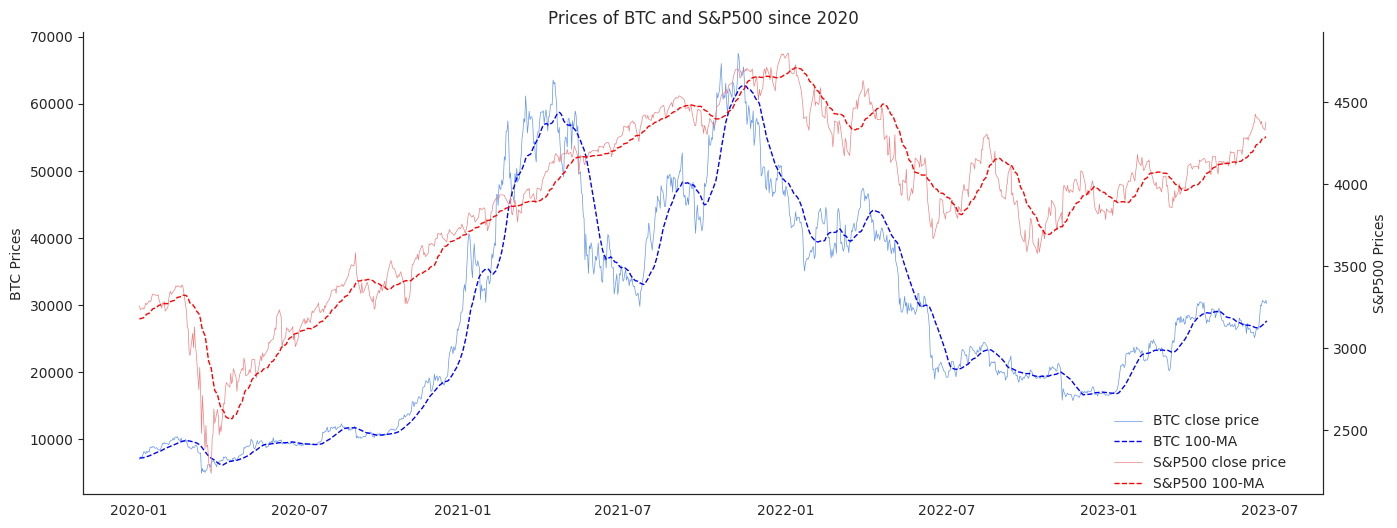

In [ ]:
create_lineplot(coin_a_price_df, SP500, "BTC", "S&P500")

The **S&P 500** is a widely followed stock market index representing the performance of 500 large-cap U.S. companies. Since 2020, the S&P 500 has shown significant overall growth. In the first half of 2020, the index experienced a sharp decline due to the COVID-19 pandemic and the resulting economic uncertainties. However, it quickly rebounded and entered a prolonged bullish trend. The index reached new all-time highs, driven by factors such as unprecedented fiscal stimulus, accommodative monetary policy, positive corporate earnings, and optimism surrounding the economic recovery. Then the index declined in the beginning of 2022 with the beginning of the war in ukraine, but got back on a positive trend slightly after. The S&P 500's upward trajectory has reflected investor confidence in the resilience of the U.S. economy and the strength of the stock market.

Now, let's take a look at the cummulative returns of both assets in order to have an idea of their performance.

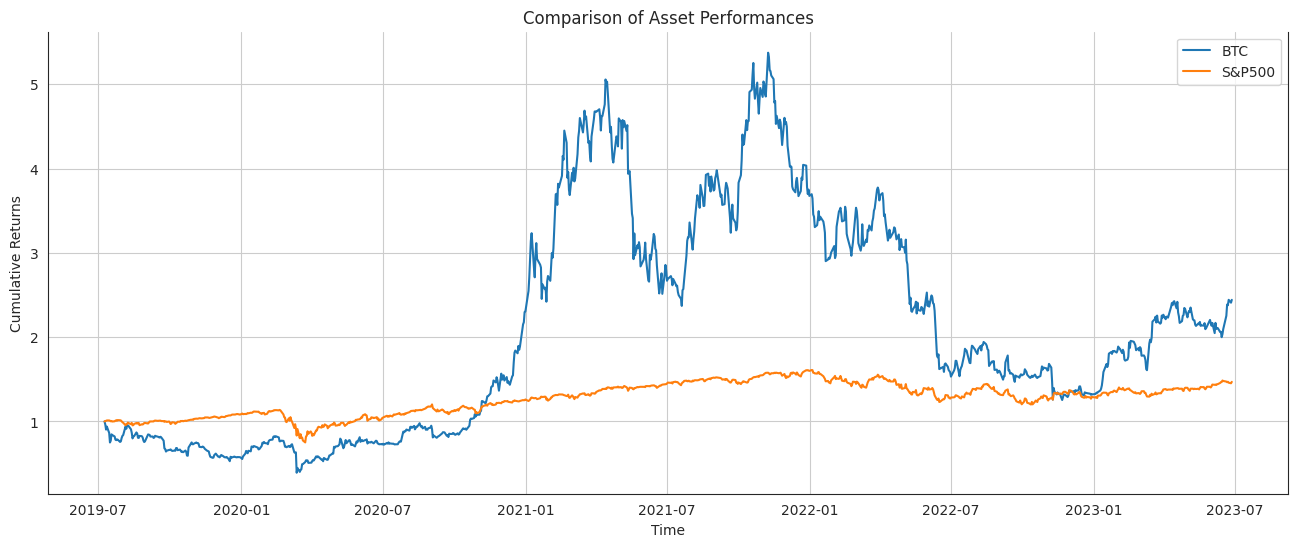

In [ ]:
coin_a_price_df_perf = coin_a_price_df[coin_a_price_df["date"].isin(list(SP500['date'].values))].reset_index()
compare_asset_performance(coin_a_price_df_perf.set_index("date")['close'], SP500.set_index("date")["close"], "BTC", "S&P500")

The graph depicting the cumulative returns of BTC and the S&P500 between July 2019 and July 2023 provides valuable insights into their performance. The range of cumulative returns for the S&P500 during this period indicates a relatively stable performance, with returns ranging between 0.8 (lowest) and 1.6 (highest). In contrast, BTC exhibits a much wider range of cumulative returns, spanning from 0.4 (lowest) to 5.3 (highest). This suggests that BTC is associated with higher volatility and potential for both significant gains and losses.

Furthermore, the graph reveals that BTC initially underperforms the S&P500 between July 2019 and October 2020, as the cumulative returns of BTC are comparatively lower during this period. However, from October 2020 onwards, BTC begins to outperform the S&P500, as its cumulative returns surpass those of the S&P500. This shift in performance indicates a changing market dynamic and highlights the potential for BTC to deliver higher returns compared to traditional stock market indices like the S&P500.

In [ ]:
zoom_compare(coin_a_price_df, SP500, "BTC", "S&P500")

The upward trend in BTC's price indicates a positive performance for the cryptocurrency. BTC's price may have experienced a significant increase over the observed period. This rise could be attributed to various factors, including growing investor interest, institutional adoption, positive market sentiment, and potential hedging against inflation or economic uncertainties.

Similarly, the upward trend in the S&P 500 suggests a positive performance in the stock market. The index's price may have shown a notable increase over the given period. The upward movement in the S&P 500 could be driven by factors such as strong corporate earnings, positive economic indicators, market optimism, and accommodative monetary policies.

The observation that the price increases for BTC and the S&P 500 are more or less strong suggests that the two assets might have experienced varying levels of growth. BTC's price increase might have been relatively more significant compared to the S&P 500's price increase. This difference in magnitude could be attributed to the unique characteristics and factors influencing each asset class.

Additionally, the fact that the price increases in BTC and the S&P 500 occurred at different times indicates that these assets may have been influenced by distinct market dynamics and events. The timing of price movements could be influenced by factors specific to each asset. For example, BTC's price might have been influenced by cryptocurrency market trends, regulatory developments, or news related to the digital asset space. On the other hand, the S&P 500's price movements could be influenced by macroeconomic indicators, corporate earnings reports, or market sentiment surrounding specific industries or sectors.

## **Correlation with Bitcoin Price**

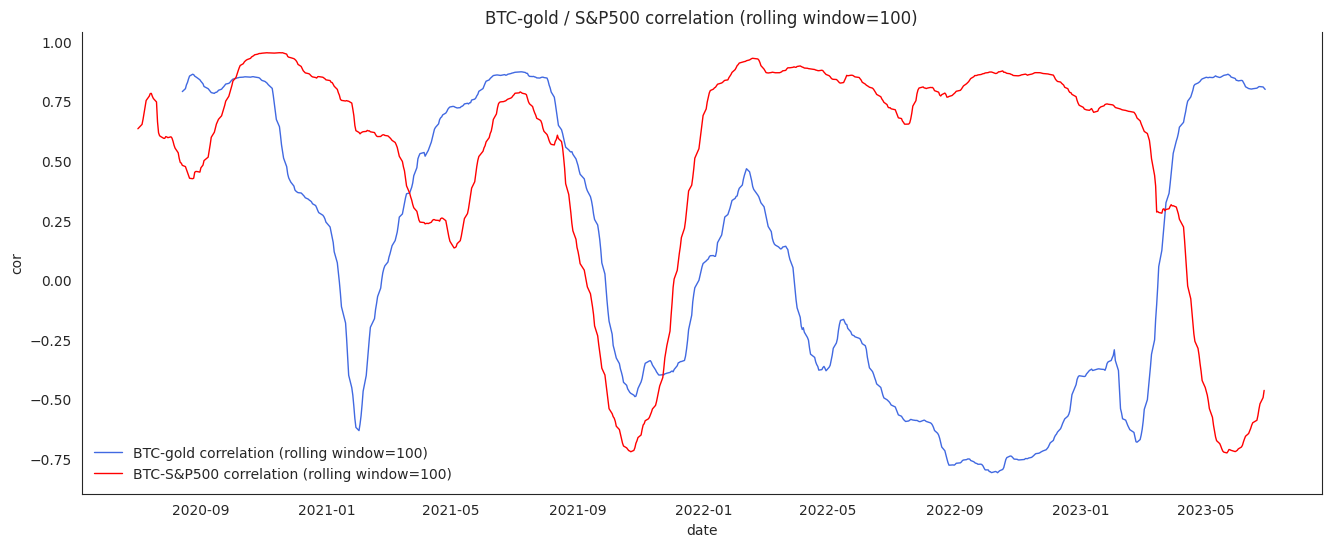

In [ ]:
corr_global()

The observed graph depicting the correlation between gold/BTC and S&P500/BTC since 2020 highlights the presence of significant volatility and alternating periods of high positive correlation and high negative correlation.

Using a rolling window of 100 days for the correlation plot offers a smoothed and longer-term perspective, mitigating short-term fluctuations and providing a more reliable estimate of their relationship. This choice enhances the statistical significance of the analysis, detects trend changes, aligns with medium-term market cycles, and enables investors to make informed decisions regarding portfolio diversification and risk management.

Here are a few key points to consider when interpreting this graph:

The presence of volatility in the correlation between these assets suggests that the relationship between these two assets is not stable or consistent over time. This volatility indicates that the correlation between these assets can vary significantly, leading to fluctuations in their price movements.

During periods of high positive correlation, the prices tend to move in the same direction. This suggests that when one asset's price increases, the other also tends to increase, and vice versa. High positive correlation periods could be driven by common factors or market conditions that influence both assets simultaneously.

Conversely, during periods of high negative correlation, the prices move in opposite directions. This means that when one asset's price increases, the other tends to decrease, and vice versa. High negative correlation periods may indicate that the assets respond differently to market conditions or have divergent drivers impacting their prices.

The alternating periods of high positive correlation and high negative correlation between gold and BTC indicate that the relationship between these assets is dynamic and subject to change. Factors such as economic conditions, investor sentiment, regulatory developments, or unique characteristics of each asset class can contribute to changing correlations over time.

The presence of both positive and negative correlation periods suggests that incorporating both assets into a diversified portfolio may provide potential benefits. During periods of high positive correlation, their prices may move in tandem, offering potential opportunities for portfolio growth. Conversely, during periods of high negative correlation, the assets may act as a hedge, with one potentially offsetting losses incurred by the other.

**Let's now zoom in to the recent time period**

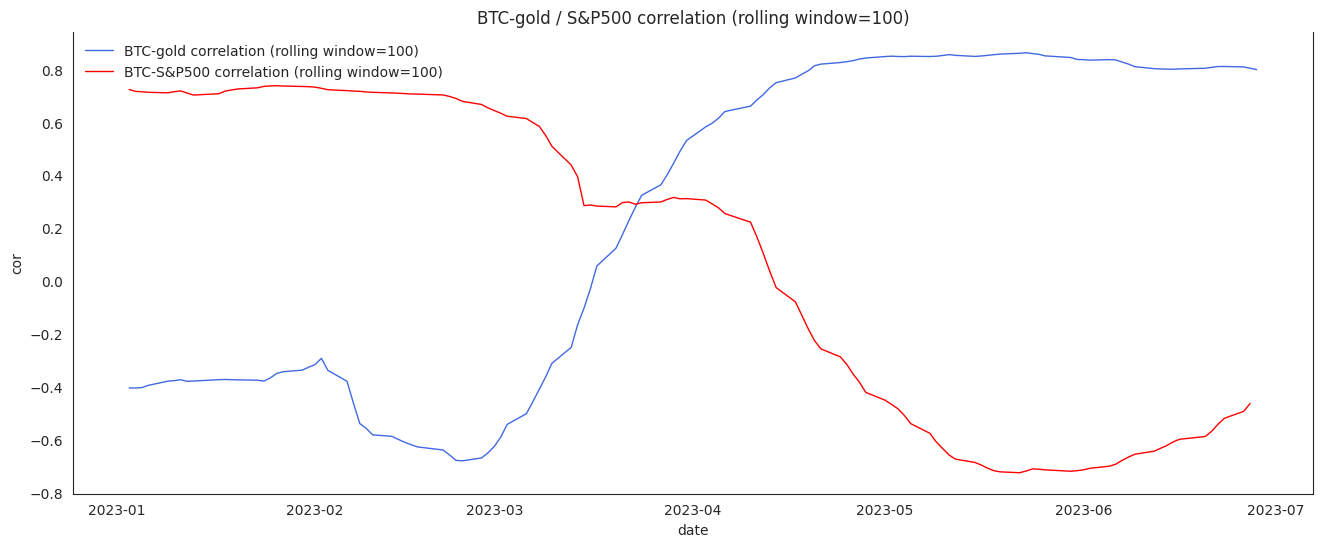

In [ ]:
corr_zoom()

The observed graph depicting strong positive correlation between BTC and S&P500 from January 2023 to April 2023, followed by a strong negative correlation from April 2023 until the present, and an inverted pattern for BTC/Gold, suggests interesting dynamics in the relationships between these assets.

The period of strong positive correlation between BTC and S&P500 from January to April 2023 indicates a scenario where both assets tended to move in the same direction. This suggests that during this period, BTC and the S&P500 were influenced by similar market factors or macroeconomic conditions. It could be indicative of investors perceiving BTC as a risk-on asset, similar to stocks, leading to a positive correlation.

During the 3 past months, the situation got reversed : we could see a strong positive correlation between BTC/gold and, on the other hand, a strong negative correlation between BTC/S&P500. This situation might suggest that BTC was more considered as a value-storage asset, similar to gold.

## **Conclusion**

In conclusion, it is evident that Bitcoin (BTC) exhibits characteristics of both a storage value and a risky asset, indicating its evolving nature in the investment landscape. The cyclical nature of BTC's perception suggests that it cannot be definitively labeled as "the new gold" at this point. However, it is noteworthy that in recent months, BTC has displayed a strong positive correlation with gold, implying a potential alignment between the two assets. The question that arises is how long this correlation will persist. Further monitoring and analysis are required to assess the durability of this relationship and to gain insights into the evolving role of Bitcoin in the context of a traditional safe-haven asset like gold.

In [11]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/Colab Notebooks/On-chain analysis/Analyzing_the_Interplay.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/On-chain analysis/Analyzing_the_Interplay.ipynb to html
[NbConvertApp] Writing 1539259 bytes to /content/drive/My Drive/Colab Notebooks/On-chain analysis/Analyzing_the_Interplay.html
